In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load Customer Data
We start by importing the dataset `credit2.csv` which contains customer demographic, financial, and behavioral data. The goal is to use this data to predict the creditworthiness of a customer.

In [5]:
customers = pd.read_csv(r'C:\Users\Admin\Downloads\credit2.csv')
customers

,customerid,credit,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,...,living_at_current_address,valueable_assets,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker
0,1001,good,no_balance_or_debit,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,used_car,from_0.5K_to_1K,from_500_to_1000_DM,less_than_1_year,more_than_35_percent,...,more_than_7_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,one,unskilled_with_permanent_residence,three_or_more,no,yes
1,1002,bad,more_than_200_DM,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,used_car,from_1.5K_to_2.5K,not_available_or_no_savings,less_than_1_year,from_20_to_35_percent,...,from_1_to_4_years,saving_contract_or_life_insurance,less_than_25,no_further_running_credits,free_apartment,two_or_three,skilled_worker,three_or_more,no,yes
2,1003,good,no_balance_or_debit,from_06_to_12,no_problems_current_credit_at_bank,furniture,from_0.5K_to_1K,not_available_or_no_savings,from_1_to_4_years,less_than_20_percent,...,more_than_7_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,two_or_three,skilled_worker,three_or_more,no,yes
3,1004,bad,no_running_account,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,furniture,from_0.5K_to_1K,less_than_100_DM,from_4_to_7_years,less_than_20_percent,...,less_than_1_year,car_or_other,less_than_25,no_further_running_credits,rented_flat,one,skilled_worker,three_or_more,no,yes
4,1005,good,no_running_account,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,furniture,from_1K_to_1.5K,not_available_or_no_savings,from_1_to_4_years,from_20_to_35_percent,...,from_1_to_4_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,one,executive,up_to_two,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,good,more_than_200_DM,<06,no_previous_credit_or_paid_back_all_previous_c...,retraining,from_2.5K_to_5K,not_available_or_no_savings,from_4_to_7_years,more_than_35_percent,...,more_than_7_years,not_available_or_no_assets,more_than_65,no_further_running_credits,rented_flat,one,unskilled_with_permanent_residence,three_or_more,no,yes
996,1997,good,more_than_200_DM,from_18_to_24,paid_back_previous_credits_at_this_bank,retraining,from_2.5K_to_5K,not_available_or_no_savings,from_1_to_4_years,from_20_to_25_percent,...,from_1_to_4_years,not_available_or_no_assets,more_than_65,no_further_running_credits,rented_flat,one,executive,three_or_more,yes,yes
997,1998,bad,no_balance_or_debit,from_06_to_12,problematic_running_account,new_car,from_5K_to_7.5K,not_available_or_no_savings,more_than_7_years,from_20_to_35_percent,...,more_than_7_years,house_or_land,more_than_65,at_other_banks,owner_occupied_flat,one,executive,up_to_two,yes,yes
998,1999,good,no_running_account,<06,no_previous_credit_or_paid_back_all_previous_c...,other,from_1K_to_1.5K,more_than_1000_DM,unemployed,less_than_20_percent,...,from_4_to_7_years,car_or_other,more_than_65,no_further_running_credits,rented_flat,one,executive,three_or_more,yes,yes


In [7]:
customers.dtypes

customerid                    int64
credit                       object
current_account              object
duration                     object
previous_credit              object
purpose                      object
amount                       object
value_saving_stocks          object
tenure                       object
install_rate                 object
marital_status_sex           object
debtor_guarantors            object
living_at_current_address    object
valueable_assets             object
age                          object
other_credits                object
apartment_type               object
credits_at_bank              object
occupation                   object
num_dependents               object
broadband                    object
foreign_worker               object
dtype: object

Set Index and Identify Categorical Columns

We set `customerid` as the index for easier reference and to identify all categorical columns that need to be encoded into a numeric form before feeding them into the model.


In [9]:
# Set 'customerid' as the index of the DataFrame
customers.set_index('customerid', inplace=True)
# List of categorical columns to be encoded
categorical_columns = [
    "credit", "current_account", "duration", "previous_credit",
    "purpose", "amount", "value_saving_stocks", "tenure",
    "install_rate", "marital_status_sex", "debtor_guarantors",
    "living_at_current_address", "valueable_assets", "age",
    "other_credits", "apartment_type", "credits_at_bank",
    "occupation", "num_dependents", "broadband", "foreign_worker"
]

# Convert each categorical column to numeric codes
for col in categorical_columns:
    customers[col] = customers[col].astype("category").cat.codes

All categorical columns are converted into numeric codes using label encoding, which allows the machine learning model to process them.

In [11]:
customers

,credit,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,marital_status_sex,...,living_at_current_address,valueable_assets,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker
customerid,,,,,,,,,,,,,,,,,,,,,
1001,1,2,2,1,8,0,1,2,3,0,...,3,2,3,2,0,1,3,0,0,1
1002,0,1,2,1,8,1,4,2,1,0,...,0,3,3,2,0,3,1,0,0,1
1003,1,2,2,2,1,0,4,0,2,1,...,3,2,3,2,0,3,1,0,0,1
1004,0,3,2,1,1,0,2,1,2,1,...,2,0,3,2,2,1,1,0,0,1
1005,1,3,2,1,1,4,4,0,1,3,...,0,2,3,2,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,0,1,7,5,4,1,3,3,...,3,2,4,2,2,1,3,0,0,1
1997,1,1,4,3,7,5,4,0,0,3,...,0,2,4,2,2,1,0,0,1,1
1998,0,2,2,4,3,6,4,3,1,0,...,3,1,4,1,1,1,0,1,1,1


Define Features and Target

We separate the dataset into:
- `X`: Feature variables (inputs)
- `y`: Target variable (`credit`) which we aim to predict

In [13]:
x = customers.drop(columns=['credit'])
y = customers['credit']

Train-Test-Split

We split the dataset into training (70%) and testing (30%) subsets. This ensures that the model is trained on one portion and validated on unseen data.

In [17]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 30) 

Train Random Forest Classifier and Evaluate

We initialise and train a Random Forest Classifier, use it to make predictions on the test set, and then evaluate performance using accuracy and a confusion matrix.

In [19]:
# creating random forest classifier
model = RandomForestClassifier(n_estimators = 100,random_state = 30)

# training the model on the training dataset
model.fit(x_train,y_train)

# performing performing on test dataset
y_pred = model.predict(x_test)

x_test['Predictions'] = y_pred
x_test['Actual'] = y_test
x_test

,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,marital_status_sex,debtor_guarantors,...,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker,Predictions,Actual
customerid,,,,,,,,,,,,,,,,,,,,,
1924,0,2,1,8,4,3,3,0,0,2,...,1,2,2,1,0,0,1,1,1,1
1922,3,3,3,2,4,4,4,1,0,2,...,1,2,1,0,2,1,0,1,1,0
1517,2,2,3,6,1,4,3,1,0,2,...,0,2,2,3,0,0,1,1,1,0
1088,3,5,1,8,1,4,1,2,0,2,...,3,2,0,1,1,0,0,1,0,0
1880,2,3,3,1,1,3,3,2,3,1,...,1,2,2,3,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1,2,3,4,1,4,0,2,3,2,...,1,2,2,0,1,0,1,1,1,1
1783,1,4,1,4,6,4,0,3,3,2,...,1,2,2,1,3,1,0,1,1,1
1599,1,2,1,7,1,4,1,1,3,2,...,0,2,2,1,1,0,1,1,1,1


In [21]:
accuracy = accuracy_score(y_test , y_pred)
print(f"Test Accuracy: {accuracy: .2f}")

Test Accuracy:  0.77


In [23]:
from sklearn.metrics import confusion_matrix
#Assuming y_test contains actual labels and y_pred contains predicted labels

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 35  52]
 [ 17 196]]


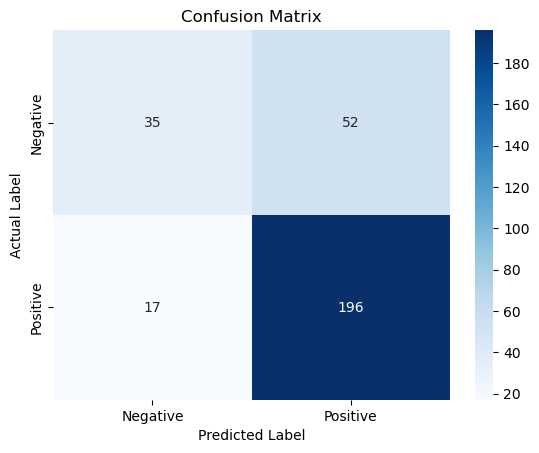

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting the confusion matrix with label
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Feature Importance Analysis

We evaluate the importance of each feature in predicting the target. This helps in understanding which variables drive the model’s decisions.

In [27]:
Feature_imp = pd.Series(model.feature_importances_, 
                        index = x_train.columns.values[:20]).sort_values(ascending=False)
Feature_imp

current_account              0.110456
duration                     0.106145
purpose                      0.086355
amount                       0.078232
previous_credit              0.063825
tenure                       0.058494
valueable_assets             0.054442
value_saving_stocks          0.051017
install_rate                 0.049699
living_at_current_address    0.049051
age                          0.048098
occupation                   0.041385
marital_status_sex           0.036918
other_credits                0.033230
apartment_type               0.032611
credits_at_bank              0.029902
broadband                    0.024604
debtor_guarantors            0.023232
num_dependents               0.017215
foreign_worker               0.005089
dtype: float64